## :  Import Data

In [1]:
import numpy as np
import matplotlib 
import scipy
import sklearn
import statsmodels
import seaborn
import pydot
from sklearn.preprocessing import StandardScaler

from statsmodels.tsa.ar_model import AutoReg 

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier


from scipy import stats
from scipy.stats.stats import mode
from scipy.stats import uniform
from sklearn.model_selection import (train_test_split, RepeatedKFold,RandomizedSearchCV)

from sklearn.linear_model import Ridge

from sklearn.svm import SVR
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pickle


from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import pandas as pd
import plotly.express as px

from sklearn.manifold import TSNE

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM


from os import listdir
from os.path import isfile, join

In [2]:
import scipy.io as sio
import numpy as np
from os import getcwd
from os.path import join 
import matplotlib.pyplot as plt

## : Início do processamento

In [3]:
input_files = [f for f in listdir('data/') if isfile(join('data/',f))
               and f.endswith('h2.csv') # to change Hidrophone, chande de h + number of hidrphone
               and 'sur_pos' not in f 
               and 'time' not in f]
input_files

# time = [f for f in listdir('data/') if isfile(join('data/',f))
#                and f.endswith('time.csv') ] 

data = np.zeros((len(input_files),19500))
label = pd.read_csv(r'data/y.csv') 

# time = pd.read_csv(r'data/sinc50kHz_casing_9_CE_samp_1_time.csv')
i = 0

for name in input_files:
    aux = np.genfromtxt('data/'+name, delimiter=',', skip_header = 1)
    aux = aux.transpose()
    x  = aux.reshape((1,-1))
    data[i,:] = x

    
    i = i+1

print(data.shape, data)

(130, 19500) [[-1.78150000e-03 -4.29500000e-04  6.71406150e-05 ...  3.59000000e-04
   1.89500000e-04  5.09000000e-04]
 [-5.78500000e-04  2.38500000e-04 -2.22500000e-04 ... -4.12618910e-04
  -8.59000000e-04 -4.47646360e-04]
 [-3.23500000e-04 -1.67500000e-04 -6.26500000e-04 ... -1.09000000e-04
   9.60000000e-05  8.65000000e-04]
 ...
 [ 1.31500000e-04 -3.63500000e-04  4.43000000e-04 ...  2.93650000e-03
  -3.99550000e-03 -7.26700000e-03]
 [-3.49020235e-04  1.40000000e-04  1.16500000e-04 ... -4.43900000e-03
  -9.55100000e-03 -5.01650000e-03]
 [ 5.15000000e-04  7.81500000e-04 -1.95000000e-04 ...  3.61300000e-03
   1.20700000e-02  1.00765000e-02]]


In [4]:
input_files

['sinc50kHz_casing_9_CE-E1_samp_10_h2.csv',
 'sinc50kHz_casing_9_CE-E1_samp_1_h2.csv',
 'sinc50kHz_casing_9_CE-E1_samp_2_h2.csv',
 'sinc50kHz_casing_9_CE-E1_samp_3_h2.csv',
 'sinc50kHz_casing_9_CE-E1_samp_4_h2.csv',
 'sinc50kHz_casing_9_CE-E1_samp_5_h2.csv',
 'sinc50kHz_casing_9_CE-E1_samp_6_h2.csv',
 'sinc50kHz_casing_9_CE-E1_samp_7_h2.csv',
 'sinc50kHz_casing_9_CE-E1_samp_8_h2.csv',
 'sinc50kHz_casing_9_CE-E1_samp_9_h2.csv',
 'sinc50kHz_casing_9_CE-E2_samp_10_h2.csv',
 'sinc50kHz_casing_9_CE-E2_samp_1_h2.csv',
 'sinc50kHz_casing_9_CE-E2_samp_2_h2.csv',
 'sinc50kHz_casing_9_CE-E2_samp_3_h2.csv',
 'sinc50kHz_casing_9_CE-E2_samp_4_h2.csv',
 'sinc50kHz_casing_9_CE-E2_samp_5_h2.csv',
 'sinc50kHz_casing_9_CE-E2_samp_6_h2.csv',
 'sinc50kHz_casing_9_CE-E2_samp_7_h2.csv',
 'sinc50kHz_casing_9_CE-E2_samp_8_h2.csv',
 'sinc50kHz_casing_9_CE-E2_samp_9_h2.csv',
 'sinc50kHz_casing_9_CE_samp_10_h2.csv',
 'sinc50kHz_casing_9_CE_samp_11_h2.csv',
 'sinc50kHz_casing_9_CE_samp_12_h2.csv',
 'sinc50kHz_cas

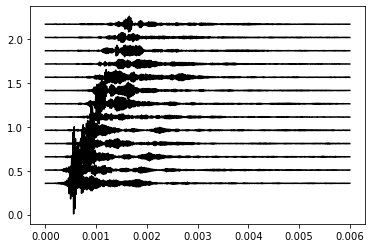

In [5]:
Ch1 = data[1,:].reshape((13,-1))

Ts = 3.125 * 1e-3 # sampling time
# time = pd.read_csv(r'data/sinc50kHz_casing_9_CE_samp_1_time.csv')
time = pd.read_csv(r'data/sinc50kHz_casing_9_CE_samp_1_time.csv') #* Ts
pos = pd.read_csv(r'data/sinc50kHz_casing_9_CE_samp_1_sur_pos.csv')

fig, ax = plt.subplots()

for case in range(0,13):
    ax.plot(time.values,Ch1[case,:] + pos.values[case][0], 'k')

plt.savefig('plot_test.png', dpi=400, format='png')


# for case in np.array([0,790]):
#     plt.figure(case)
#     plt.subplot(211)
#     plt.title('case %d, label %d' % (case, y[case]))
#     plt.plot(time,Ch1[:,case])
#     plt.ylabel('Force')
#     plt.subplot(212)
#     plt.plot(time,Ch2[:,case],time,Ch3[:,case],time,Ch4[:,case],time,Ch5[:,case])
#     plt.xlabel('Time')
#     plt.ylabel('Acceleration')
#     plt.show()

In [6]:
time.values

array([[0.000e+00],
       [4.000e-06],
       [8.000e-06],
       ...,
       [5.988e-03],
       [5.992e-03],
       [5.996e-03]])

In [7]:
Ch1

array([[-5.7850000e-04,  2.3850000e-04, -2.2250000e-04, ...,
         1.6350000e-04,  9.1900000e-04,  5.1100000e-04],
       [-6.2000000e-05,  9.5500000e-05, -6.9964315e-05, ...,
         1.1930000e-03,  1.9940000e-03,  7.2250000e-04],
       [ 2.9227246e-04, -3.5500000e-05, -4.7300000e-04, ...,
        -7.4300000e-04, -8.3850000e-04, -2.9876192e-04],
       ...,
       [-1.4950000e-04, -4.5900000e-04,  3.4250000e-04, ...,
        -8.0000000e-06,  7.7050000e-04,  5.2018440e-05],
       [ 9.0000000e-05, -9.0000000e-05,  2.1250000e-04, ...,
        -2.2450000e-04, -9.1950000e-04, -8.5550000e-04],
       [-1.9050000e-04, -1.5000000e-06,  1.8529577e-04, ...,
        -4.1261891e-04, -8.5900000e-04, -4.4764636e-04]])

## : feature extraction PCA 


In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.95)
X_pca = pca.fit_transform(data)

print('matrix X.shape: ',X_pca.shape,'\n X_PCA:', X_pca)

matrix X.shape:  (130, 29) 
 X_PCA: [[-0.38681421 -0.26186959 -0.30030816 ...  0.06200051  0.08777963
   0.05735348]
 [ 0.33161885  0.07850756 -0.36637792 ... -0.04918447 -0.06194632
  -0.1015151 ]
 [-0.18840814 -0.12674486 -0.16353836 ...  0.21731099 -0.05342635
  -0.20863634]
 ...
 [-0.22524856 -1.69045903  0.16656301 ...  0.00794452  0.07148432
  -0.05003675]
 [-0.20028812 -1.6016784   0.24805238 ...  0.219046   -0.36124246
   0.318735  ]
 [-0.59172438 -1.19999485 -0.34580985 ... -0.25929762  0.33365249
  -0.35025086]]


In [9]:
print(pca.explained_variance_ratio_ , pca.singular_values_)

[0.28797957 0.11772908 0.10635468 0.08685454 0.04754849 0.03879924
 0.03194181 0.02971554 0.0276225  0.02000241 0.01846119 0.0166423
 0.01509645 0.01357587 0.01225009 0.01052555 0.00937789 0.00879208
 0.0074729  0.00694817 0.00632212 0.00522983 0.00475988 0.00451877
 0.00421178 0.00410908 0.00369224 0.00323622 0.00298987] [16.71313238 10.68609169 10.15676301  9.17853283  6.79118229  6.1346333
  5.56617438  5.36869614  5.17616952  4.40471846  4.23162179  4.01775691
  3.82661171  3.62878137  3.4470424   3.19520981  3.01598746  2.92026867
  2.6922892   2.59604461  2.47632853  2.2522724   2.14869699  2.09356832
  2.02120234  1.99640729  1.89243987  1.77172398  1.70295594]


## : Scale Feature

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Normalizando PCA
X1_max_min = MinMaxScaler(feature_range=(-1,1))
X1_train = X1_max_min.fit_transform(X_pca)
X1_train

print('Confirmando a normalização:','\n X1 máximo normalizado: ', X1_train.max(), '\n X1 minimo normalizado: ',X1_train.min())


Confirmando a normalização: 
 X1 máximo normalizado:  1.0000000000000004 
 X1 minimo normalizado:  -1.0
